Try DARTFISH first

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import starfish.data
from starfish import display, FieldOfView
from starfish import FieldOfView
from starfish.types import Axes

from starfish.image import Filter
from starfish.util.plot import imshow_plane, intensity_histogram

In [6]:
import starfish.data

In [9]:
starfish.data

<module 'starfish.data' from '/Users/mcai/starfish-CI/starfish/starfish/data.py'>

In [11]:
experiment = starfish.data.DARTFISH(use_test_data=False)

imgs = experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)

In [12]:
def imshow_3channels(stack: starfish.ImageStack, r: int):
    fig = plt.figure(dpi=150)
    ax1 = fig.add_subplot(131, title='ch: 0')
    ax2 = fig.add_subplot(132, title='ch: 1')
    ax3 = fig.add_subplot(133, title='ch: 2')
    imshow_plane(stack, sel={Axes.ROUND: r, Axes.CH: 0}, ax=ax1)
    imshow_plane(stack, sel={Axes.ROUND: r, Axes.CH: 1}, ax=ax2)
    imshow_plane(stack, sel={Axes.ROUND: r, Axes.CH: 2}, ax=ax3)

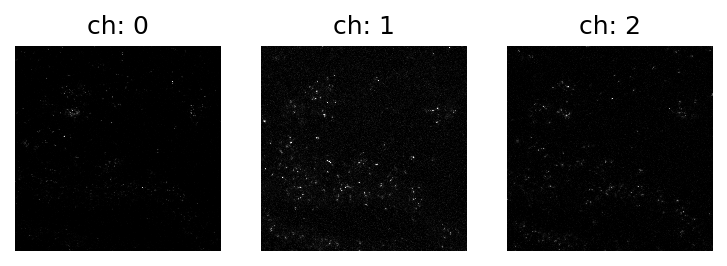

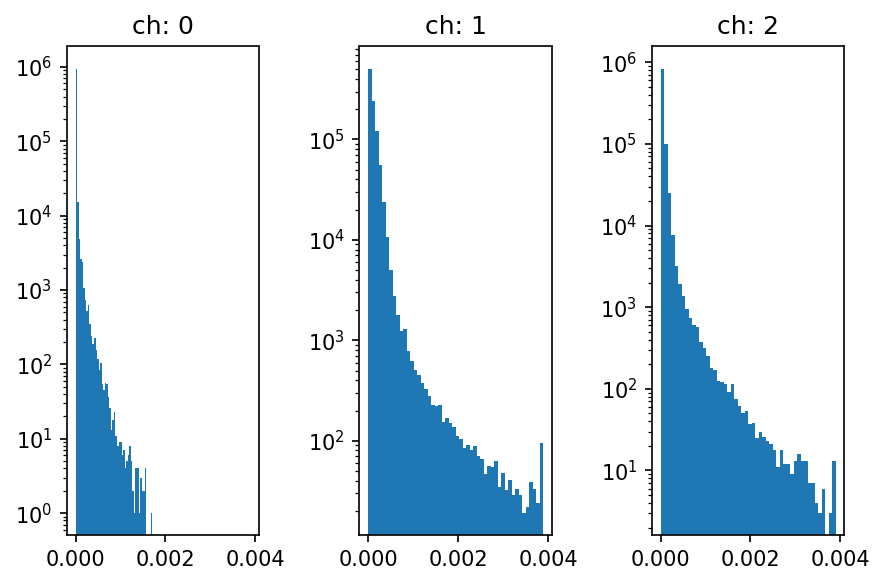

In [15]:
imshow_3channels(stack=imgs, r=1)
plot_intensity_histograms(stack=imgs, r=1)

In [14]:
def plot_intensity_histograms(stack: starfish.ImageStack, r: int):
    fig = plt.figure(dpi=150)
    ax1 = fig.add_subplot(131, title='ch: 0')
    ax2 = fig.add_subplot(132, title='ch: 1', sharex=ax1)
    ax3 = fig.add_subplot(133, title='ch: 2', sharex=ax1)
    intensity_histogram(stack, sel={Axes.ROUND: r, Axes.CH: 0}, log=True, bins=50, ax=ax1)
    intensity_histogram(stack, sel={Axes.ROUND: r, Axes.CH: 1}, log=True, bins=50, ax=ax2)
    intensity_histogram(stack, sel={Axes.ROUND: r, Axes.CH: 2}, log=True, bins=50, ax=ax3)
    fig.tight_layout()

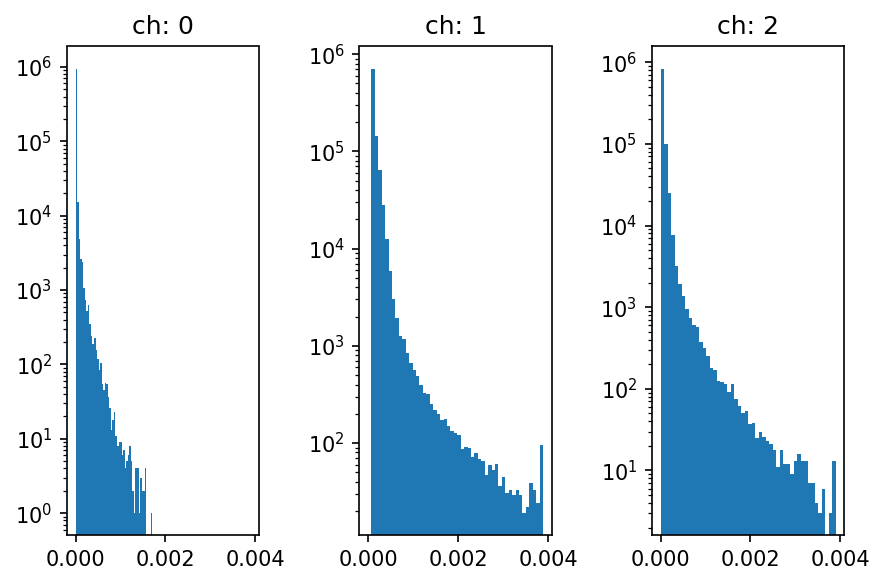

In [19]:
#cptz = Filter.ClipPercentileToZero(p_min=50, p_max=100)
clip_50 = Filter.Clip(p_min=50, p_max=100)
imgs_50min = clip_50.run(imgs, in_place=False)
plot_intensity_histograms(stack=imgs_50min, r=1)

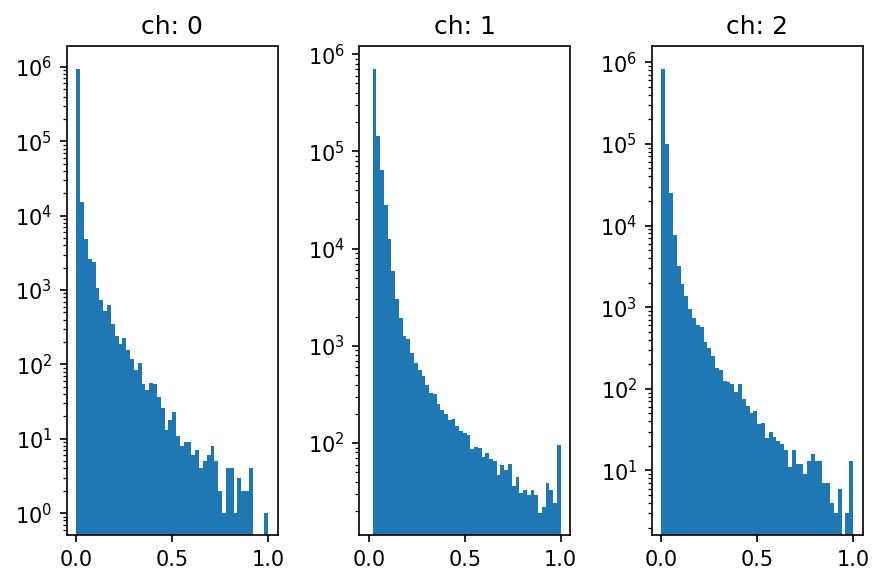

In [20]:
scale = Filter.Clip(expand_dynamic_range=True)
imgs_50min_scaled = scale.run(imgs_50min, in_place=False)
plot_intensity_histograms(stack=imgs_50min_scaled, r=1)

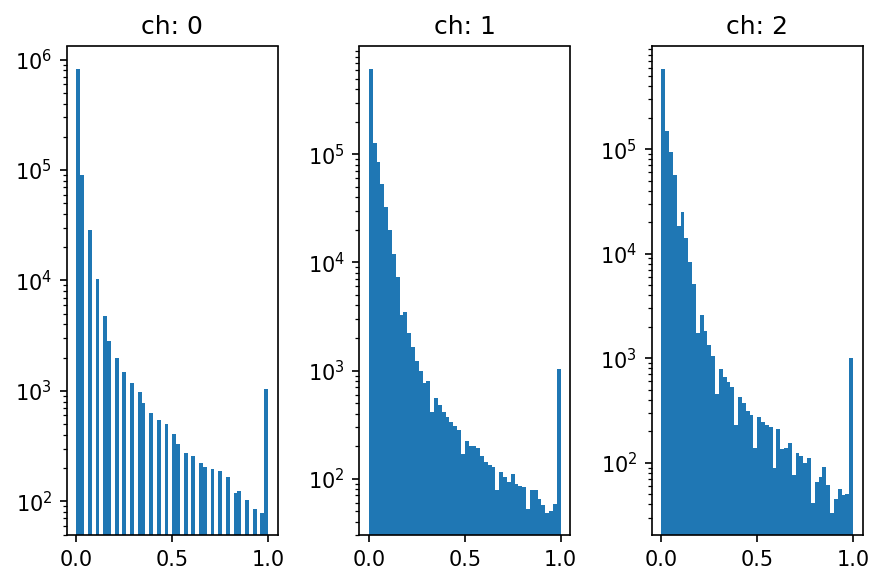

In [23]:
clip_50 = Filter.ClipPercentileToZero(p_min=50, p_max=99.9)
zerod_50 = clip_50.run(imgs, in_place=False)
zerod_scaled_50 = scale.run(zerod_50)
plot_intensity_histograms(stack=zerod_scaled_50, r=1)

In [72]:
clip_99percent = cptz.run(imgs, in_place=False)

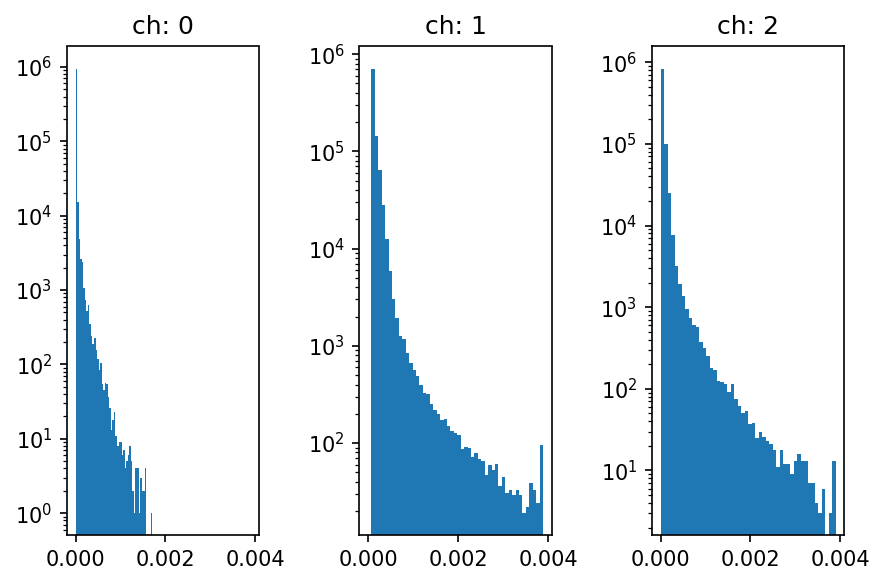

In [73]:
clippy = Filter.Clip(expand_dynamic_range=False)
plot_ready = clippy.run(clip_99percent, in_place=False)
plot_intensity_histograms(stack=plot_ready, r=1)

In [69]:
cptz = Filter.ClipPercentileToZero(p_min=99.5, p_max=100)
#cptz = Filter.Clip(p_min=50, p_max=100)

clip_99percent = cptz.run(imgs, in_place=False)

clippy = Filter.Clip(expand_dynamic_range=True)
plot_ready = clippy.run(clip_99percent, in_place=False)
#plot_intensity_histograms(stack=plot_ready, r=1)

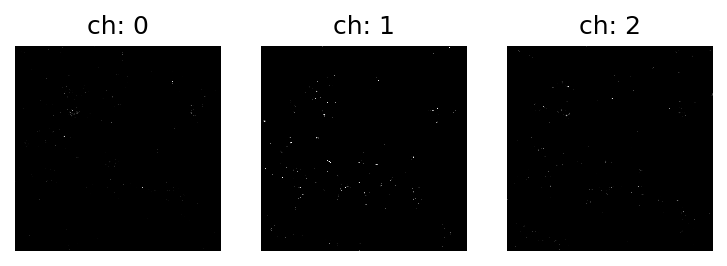

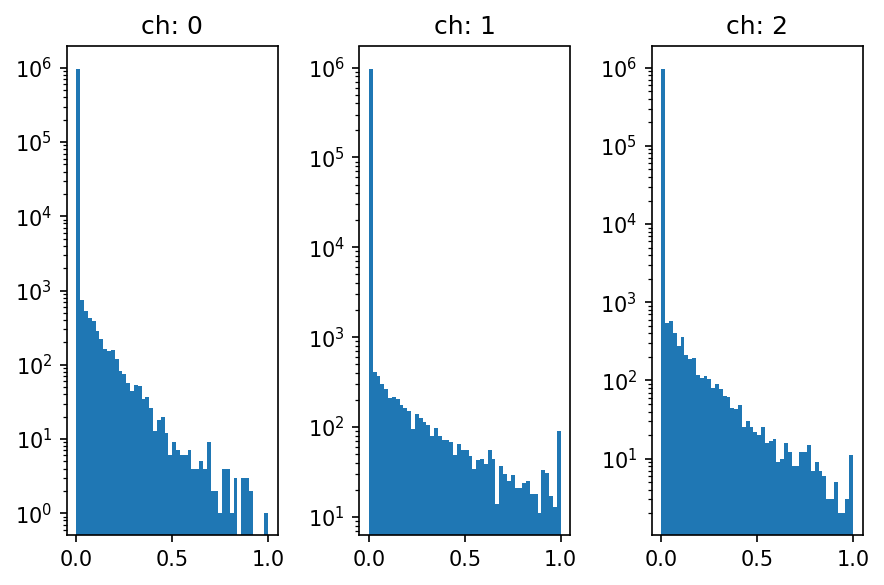

In [70]:
imshow_3channels(stack=plot_ready, r=1)
plot_intensity_histograms(stack=plot_ready, r=1)

  1%|          | 5/672 [00:00<00:22, 30.21it/s]

<starfish.ImageStack (r: 6, c: 4, z: 28, y: 1024, x: 1024)>


100%|██████████| 672/672 [00:05<00:00, 120.64it/s]


<starfish.ImageStack (r: 1, c: 1, z: 28, y: 1024, x: 1024)>


100%|██████████| 28/28 [00:00<00:00, 138.12it/s]


KeyError: 1

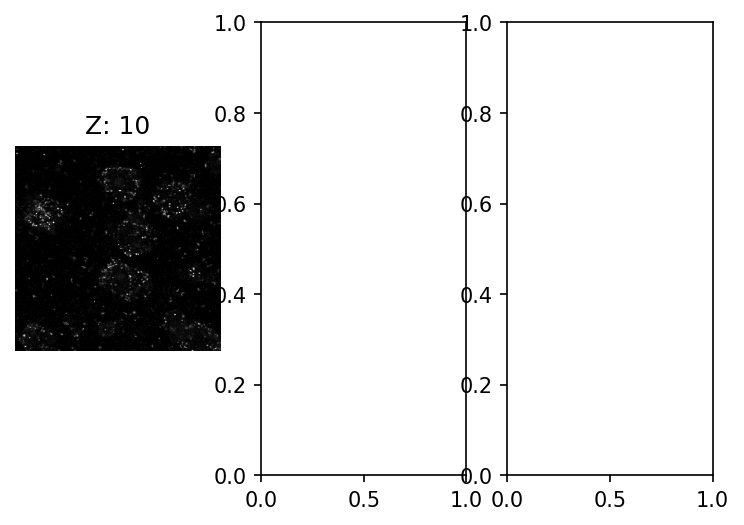

In [2]:
# Load :py:class:`ImageStack` from example STARmap data
import starfish.data
from starfish import FieldOfView
from starfish.types import Axes
experiment = starfish.data.STARmap(use_test_data=True)
stack = experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)
print(stack)

# Maximum project :py:class:`ImageStack` along z-axis
projection = stack.reduce({Axes.ZPLANE}, func="max")
print(projection)

# Plot
import matplotlib
import matplotlib.pyplot as plt
from starfish.util.plot import imshow_plane
matplotlib.rcParams["figure.dpi"] = 150
f, (ax1, ax2, ax3) = plt.subplots(ncols=3)

# Plot first round and channel of projected :py:class:`ImageStack`
imshow_plane(stack, sel={Axes.ROUND: 0, Axes.CH: 1, Axes.ZPLANE: 10}, ax=ax1, title='Z: 10')
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 1}, ax=ax2, title='Max Projection')
# Plot ROI of projected image
selector = {Axes.CH: 0, Axes.ROUND: 0, Axes.X: (500, 700), Axes.Y: (500, 700)}
imshow_plane(projection, sel=selector, ax=ax3, title='Max Projection\nROI')

In [3]:
projection

<starfish.ImageStack (r: 1, c: 1, z: 28, y: 1024, x: 1024)>

<starfish.ImageStack (r: 6, c: 4, z: 1, y: 1024, x: 1024)>


100%|██████████| 24/24 [00:00<00:00, 219.17it/s]


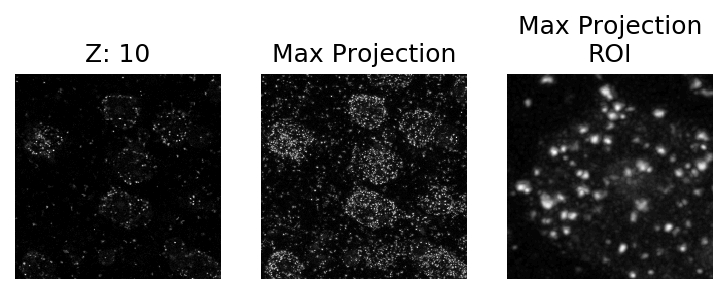

In [6]:
projection = stack.reduce({Axes.ZPLANE}, func="max")
print(projection)

# Plot
import matplotlib
import matplotlib.pyplot as plt
from starfish.util.plot import imshow_plane
matplotlib.rcParams["figure.dpi"] = 150
f, (ax1, ax2, ax3) = plt.subplots(ncols=3)

# Plot first round and channel of projected :py:class:`ImageStack`
imshow_plane(stack, sel={Axes.ROUND: 0, Axes.CH: 1, Axes.ZPLANE: 10}, ax=ax1, title='Z: 10')
imshow_plane(projection, sel={Axes.ROUND: 0, Axes.CH: 1}, ax=ax2, title='Max Projection')
# Plot ROI of projected image
selector = {Axes.CH: 0, Axes.ROUND: 0, Axes.X: (400, 600), Axes.Y: (550, 750)}
imshow_plane(projection, sel=selector, ax=ax3, title='Max Projection\nROI')

In [1]:
import starfish.data
from starfish import FieldOfView
from starfish.types import Axes
df_experiment = starfish.data.DARTFISH(use_test_data=False)
df_stack = df_experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)
print(df_stack)

# Run MatchHistograms with group_by={Axes.CH}
mh_c = starfish.image.Filter.MatchHistograms({Axes.CH})
scaled_c = mh_c.run(df_stack, in_place=False, verbose=False, n_processes=8)


####################################################################################################
# How to match histograms across channels *and* rounds

# Use loaded `ImageStack` from example DARTFISH data
# Run MatchHistograms with group_by={Axes.CH, Axes.ROUND}
mh_cr = starfish.image.Filter.MatchHistograms({Axes.CH, Axes.ROUND})
scaled_cr = mh_cr.run(df_stack, in_place=False, verbose=False, n_processes=8)

####################################################################################################
# How to match histograms across z-planes

# Load :py:class:`ImageStack` from example BaristaSeq data
bs_experiment = starfish.data.BaristaSeq(use_test_data=False)
bs_stack = bs_experiment.fov().get_image(FieldOfView.PRIMARY_IMAGES)
print(bs_stack)

mh_z = starfish.image.Filter.MatchHistograms({Axes.ZPLANE})
scaled_z = mh_z.run(bs_stack, in_place=False, verbose=False, n_processes=8)

100%|██████████| 18/18 [00:00<00:00, 120.45it/s]

<starfish.ImageStack (r: 6, c: 3, z: 1, y: 988, x: 988)>



  2%|▏         | 4/204 [00:00<00:05, 35.67it/s]

<starfish.ImageStack (r: 3, c: 4, z: 17, y: 1000, x: 800)>


100%|██████████| 204/204 [00:01<00:00, 157.98it/s]


In [5]:
scaled_z

<starfish.ImageStack (r: 3, c: 4, z: 17, y: 1000, x: 800)>

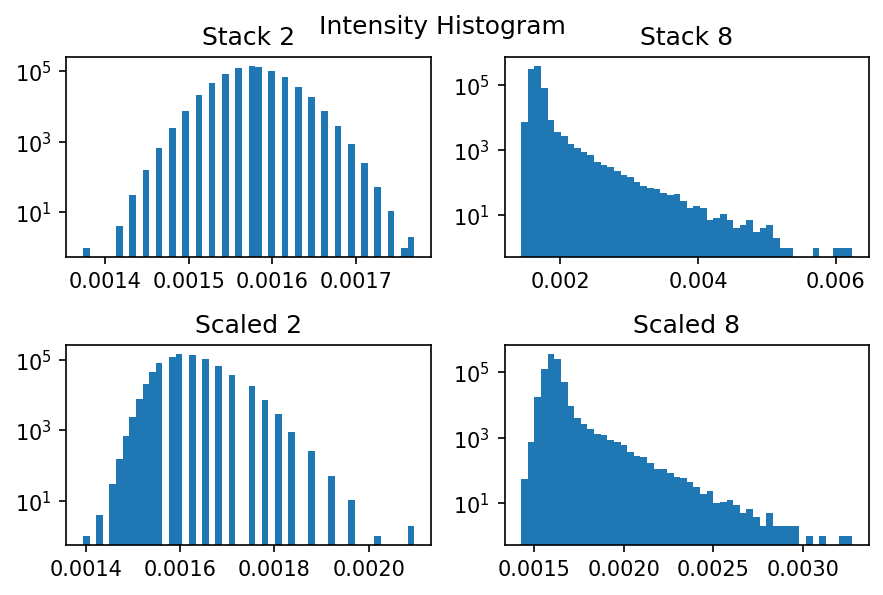

In [10]:
import matplotlib
import matplotlib.pyplot as plt
from starfish.util.plot import intensity_histogram
matplotlib.rcParams["figure.dpi"] = 150
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
f.suptitle('Intensity Histogram')

# Plot intensity distribution of entire as a histogram with 50 bins
intensity_histogram(bs_stack, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 2}, log=True, bins=50, ax=ax1,
                    title='Stack 2')
intensity_histogram(bs_stack, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 8}, log=True, bins=50, ax=ax2,
                    title='Stack 8')
intensity_histogram(scaled_z, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 2}, log=True, bins=50, ax=ax3,
                    title='Scaled 2')
intensity_histogram(scaled_z, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 8}, log=True, bins=50, ax=ax4,
                    title='Scaled 8')
f.tight_layout()

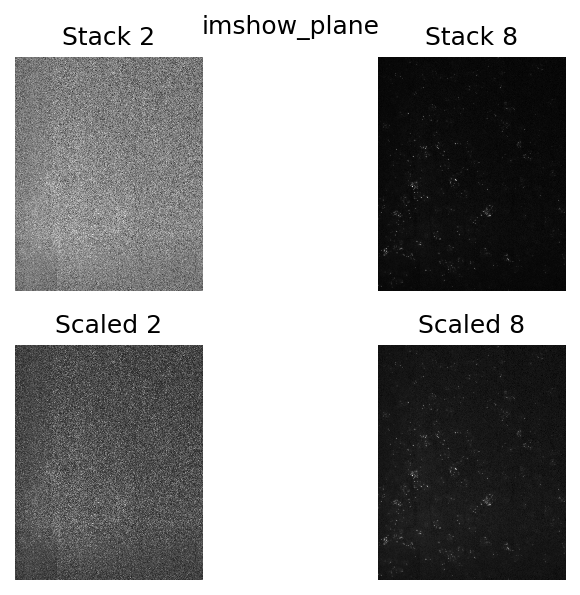

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from starfish.util.plot import intensity_histogram, imshow_plane
matplotlib.rcParams["figure.dpi"] = 150
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
f.suptitle('imshow_plane')

# Plot intensity distribution of entire as a histogram with 50 bins
imshow_plane(bs_stack, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 2}, ax=ax1,
                    title='Stack 2')
imshow_plane(bs_stack, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 8}, ax=ax2,
                    title='Stack 8')
imshow_plane(scaled_z, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 2}, ax=ax3,
                    title='Scaled 2')
imshow_plane(scaled_z, sel={Axes.ROUND: 0, Axes.CH: 0, Axes.ZPLANE: 8}, ax=ax4,
                    title='Scaled 8')
f.tight_layout()